### Performing sentiment analysis on the Elon-musk's tweets 

#### 1. Importing libraries

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import spacy
import re
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



#### 2. Importing the dataset

In [3]:
tweet_data=pd.read_csv('Elon_musk.csv', encoding='Latin-1')
tweet_data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
tweet_data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


### 3. Data preparation 
#### 3.1 Preparing a pipeline for text preprocessing

In [5]:
tweet_data= tweet_data.drop(labels='Unnamed: 0', axis=True)
tweet_data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
tweet_data.Text

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [7]:
# remove both the leading and the trailing characters
tweet_data_modified=[Text.strip() for Text in tweet_data.Text] 

In [8]:
tweet_data_modified

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [9]:
# Joining the list into one string/text

tweet_data_modified=' '.join(tweet_data_modified)
tweet_data_modified

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [10]:
# remove https or url within text
tweet_data_modified=re.sub(r'http\S+', '', tweet_data_modified)
tweet_data_modified

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox!  Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.  @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest  @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha  @freewalletorg Any crypto wallet 

In [11]:
# removing Twitter username handles from a given twitter text (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweet_data_tokenized=tknzr.tokenize(tweet_data_modified)
print(tweet_data_tokenized)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', ',', 'but'

In [12]:
corpus = []
ps=PorterStemmer()

for i in range(0,len(tweet_data_tokenized)):
    review= re.sub('[^a-zA-Z]',' ', tweet_data_tokenized[i])
    review =  re.sub(r"\b[a-zA-Z]\b", "", review)

    review=review.lower()
    review=review.split()
    review  = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' ' .join(review)
    
    
    corpus.append(review)
    

In [13]:
corpus

['',
 '',
 '',
 '',
 'alien',
 'ray',
 'trace',
 '',
 'cyberpunk',
 '',
 'hdr',
 '',
 'next level',
 '',
 '',
 '',
 'tri',
 '',
 '',
 'great',
 'interview',
 '',
 'doge',
 '',
 'underestim',
 'congratul',
 'tesla',
 'china',
 '',
 'amaz',
 'execut',
 'last',
 'year',
 '',
 '',
 '',
 '',
 '',
 'next',
 '',
 'even',
 '',
 '',
 '',
 'happi',
 'new',
 'year',
 '',
 '',
 'ox',
 '',
 'frodo',
 '',
 '',
 'underdog',
 '',
 '',
 'thought',
 '',
 'would',
 'fail',
 '',
 '',
 '',
 '',
 '',
 '',
 'haha',
 'thank',
 '',
 'inde',
 '',
 'tweet',
 'definit',
 '',
 '',
 'repres',
 'real world',
 'time',
 'alloc',
 '',
 '',
 '',
 'entertain',
 'outcom',
 '',
 '',
 '',
 'like',
 '',
 'sent',
 '',
 '',
 'agre',
 '',
 '',
 'clubhous',
 '',
 '',
 '',
 '',
 'get',
 'real',
 'bought',
 '',
 'dogecoin',
 '',
 'lil',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'toddler',
 'hodler',
 '',
 'definit',
 '',
 'issu',
 '',
 '',
 '',
 'sentenc',
 'seem',
 '',
 'bit',
 'high',
 'thank',
 '',
 'fix',
 'pleas',
 'unlock',
 '',
 

In [14]:
# removes empty strings, because they are considered in Python as False
corpus=[Text for Text in corpus if Text] 

# Again Joining the list into one string/text
cleaned_tweet_data=' '.join(corpus)


In [15]:
cleaned_tweet_data

'alien ray trace cyberpunk hdr next level tri great interview doge underestim congratul tesla china amaz execut last year next even happi new year ox frodo underdog thought would fail haha thank inde tweet definit repres real world time alloc entertain outcom like sent agre clubhous get real bought dogecoin lil toddler hodler definit issu sentenc seem bit high thank fix pleas unlock account true power haha crypto wallet give privat key avoid cost app suck rt nasa select falcon heavi launch first two element lunar gateway togeth one mission ye predict cash flow reason well starlink ipo starlink staggeringli difficult technic econom endeavor howev spacex need pass deep chasm neg cash flow next year lowest cost per ton carbon sequest net valu product made must scalabl meant price countri differ tax ship intend earth may idea appli mar xprize team manag carbon captur prize everyon tesla receiv stock comp stock option take tabl miss back work go seem bit high doge appear inflationari meanin

### 4. Creating a document matrix

#### 4.1 Implementing Bag of words model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer  
cv=CountVectorizer(max_features=(2500))
X= cv.fit_transform(corpus)


In [17]:
print(cv.vocabulary_)

{'alien': 74, 'trace': 2224, 'cyberpunk': 466, 'hdr': 1019, 'next': 1423, 'level': 1292, 'tri': 2239, 'great': 971, 'interview': 1179, 'doge': 577, 'underestim': 2290, 'congratul': 427, 'tesla': 2147, 'china': 390, 'amaz': 94, 'execut': 728, 'last': 1261, 'year': 2486, 'even': 707, 'happi': 1002, 'new': 1421, 'frodo': 876, 'underdog': 2289, 'thought': 2171, 'would': 2471, 'fail': 761, 'haha': 992, 'thank': 2155, 'inde': 1136, 'tweet': 2263, 'definit': 502, 'repres': 1666, 'real': 1620, 'world': 2466, 'time': 2186, 'alloc': 76, 'entertain': 680, 'outcom': 1465, 'like': 1298, 'sent': 1810, 'agre': 59, 'clubhous': 402, 'get': 926, 'bought': 314, 'dogecoin': 579, 'toddler': 2195, 'hodler': 1059, 'issu': 1196, 'sentenc': 1811, 'seem': 1800, 'bit': 276, 'high': 1050, 'fix': 822, 'pleas': 1543, 'unlock': 2312, 'account': 22, 'true': 2248, 'power': 1554, 'crypto': 454, 'wallet': 2385, 'give': 937, 'privat': 1570, 'key': 1229, 'avoid': 199, 'cost': 438, 'app': 125, 'suck': 2049, 'rt': 1735, 'na

### 5. Named Entity Recognition (NER)


In [18]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=cleaned_tweet_data
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [19]:
len(doc_block)

10066

In [20]:
for token in doc_block:
    print(token,token.pos_)    

alien PROPN
ray NOUN
trace NOUN
cyberpunk NOUN
hdr PROPN
next ADJ
level NOUN
tri PROPN
great ADJ
interview PROPN
doge PROPN
underestim PROPN
congratul X
tesla PROPN
china PROPN
amaz ADV
execut ADJ
last ADJ
year NOUN
next ADV
even ADV
happi PROPN
new ADJ
year NOUN
ox NOUN
frodo NOUN
underdog NOUN
thought NOUN
would AUX
fail VERB
haha AUX
thank VERB
inde ADJ
tweet NOUN
definit NOUN
repres VERB
real ADJ
world NOUN
time NOUN
alloc ADJ
entertain NOUN
outcom INTJ
like ADP
sent VERB
agre PROPN
clubhous ADJ
get VERB
real ADV
bought VERB
dogecoin NOUN
lil NOUN
toddler NOUN
hodler NOUN
definit NOUN
issu NOUN
sentenc NOUN
seem VERB
bit NOUN
high ADJ
thank NOUN
fix NOUN
pleas NOUN
unlock NOUN
account NOUN
true ADJ
power NOUN
haha NOUN
crypto NOUN
wallet NOUN
give VERB
privat NOUN
key ADJ
avoid NOUN
cost NOUN
app NOUN
suck PROPN
rt PROPN
nasa PROPN
select PROPN
falcon PROPN
heavi PROPN
launch PROPN
first ADV
two NUM
element NOUN
lunar ADJ
gateway NOUN
togeth PROPN
one NUM
mission NOUN
ye NOUN
predi

In [21]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['ray', 'trace', 'cyberpunk', 'level', 'year', 'year', 'ox', 'frodo', 'underdog', 'thought', 'fail', 'thank', 'tweet', 'definit', 'repres', 'world', 'time', 'entertain', 'sent', 'get', 'bought', 'dogecoin', 'lil', 'toddler', 'hodler', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'thank', 'fix', 'pleas', 'unlock', 'account', 'power', 'haha', 'crypto', 'wallet', 'give', 'privat', 'avoid', 'cost', 'app', 'element', 'gateway', 'mission', 'ye', 'predict', 'cash', 'flow', 'reason', 'starlink', 'ipo', 'starlink', 'staggeringli', 'econom', 'endeavor', 'howev', 'spacex', 'pass', 'chasm', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'valu', 'product', 'made', 'scalabl', 'meant', 'price', 'countri', 'differ', 'tax', 'ship', 'earth', 'idea', 'tesla', 'receiv', 'stock', 'comp', 'stock', 'option', 'take', 'work', 'go', 'seem', 'appear', 'meaning', 'fix', 'coin', 'unit', 'time', 'orbit', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'booster', 'mass', 'work', 'tonight', 'ogecoin', 'in

In [23]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:50] # viewing top ten results

,word,count
0,launch,56
1,tesla,52
2,make,51
3,year,48
4,product,46
5,work,46
6,engin,45
7,need,42
8,test,39
9,time,38


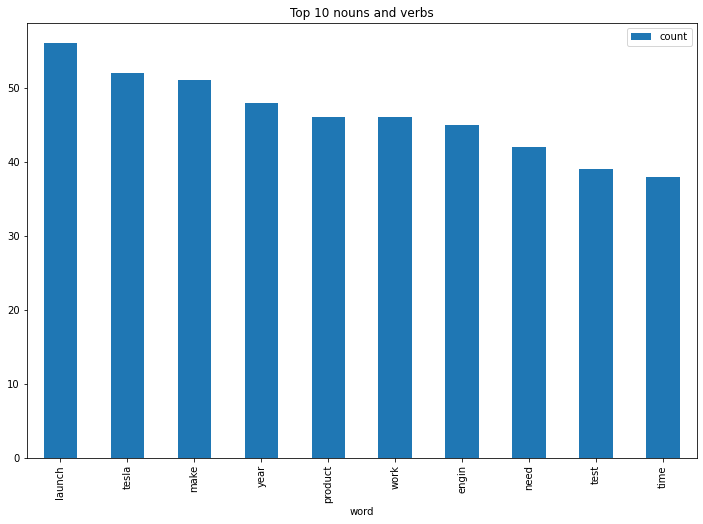

In [24]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

### 6. Emotion mining 

In [25]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(nouns_verbs))
sentences

['ray trace cyberpunk level year year ox frodo underdog thought fail thank tweet definit repres world time entertain sent get bought dogecoin lil toddler hodler definit issu sentenc seem bit thank fix pleas unlock account power haha crypto wallet give privat avoid cost app element gateway mission ye predict cash flow reason starlink ipo starlink staggeringli econom endeavor howev spacex pass chasm cash flow year cost ton carbon valu product made scalabl meant price countri differ tax ship earth idea tesla receiv stock comp stock option take work go seem appear meaning fix coin unit time orbit launch tower stack raptor orbit booster booster mass work tonight ogecoin instruct video peopl spoken reflect time cost peopl rain pain let doge come fun simplic geniu yup easi work look note email text lesson learn time tell stori tesla read kingdom heard year yolt thing restaur get hang earth scratch destini franz essenti said ship land burn solut use isp intuit seem turbopump raptor falcon laun

In [26]:
sent_df=pd.DataFrame(tweet_data,columns=['Text'])
sent_df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [27]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [28]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [29]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [38]:
# manual testing
calculate_sentiment(text='great')

3

In [39]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['Text'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       0
2       3
3      -1
4       4
       ..
1994   -3
1995    1
1996    0
1997    0
1998    2
Name: sentiment_value, Length: 1999, dtype: int64

In [40]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['Text'].str.split().apply(len)
sent_df['word_count']

0        4
1       13
2        4
3        4
4       17
        ..
1994    23
1995    12
1996     4
1997     7
1998     4
Name: word_count, Length: 1999, dtype: int64

In [33]:
sent_df.sort_values(by='sentiment_value')


,Text,sentiment_value,word_count
186,"@naval [Some tyranny]. Also, the road to hell ...",-7,14
1637,@TimothyBuffett @Teslarati Apart from failing ...,-6,17
1015,@enn_nafnlaus There are sketchy edits to Tesla...,-6,17
1717,@Neuro_Skeptic They dont fire all at once. So...,-6,20
1533,@PPathole The early investor part of Tesla i...,-5,21
...,...,...,...
458,@teslaownerssv It will get absurdly good. Tesl...,10,18
1357,Great trip to Germany. Support from government...,10,12
468,@picot_john @CyberpunkGame Its a good to grea...,10,20
1304,"One way or another, excitement guaranteed! Sup...",11,17


In [34]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1999.000000
mean        0.637819
std         1.729416
min        -7.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [35]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]


,Text,sentiment_value,word_count
0,@kunalb11 Im an alien,0,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
3,@gtera27 Doge is underestimated,-1,4
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0,7
6,"Frodo was the underdoge,\nAll thought he would...",-2,14
...,...,...,...
1992,AI symbiosis while u wait,0,5
1993,@vistacruiser7 @flcnhvy Theres some of that too,0,7
1994,"@flcnhvy True, it sounds so surreal, but the n...",-3,23
1996,@TeslaGong @PPathole Samwise Gamgee,0,4


In [36]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,Text,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
4,@teslacn Congratulations Tesla China for amazi...,4,17
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),2,6
9,The most entertaining outcome is the most likely,2,8
11,Just agree to do Clubhouse with @kanyewest,1,7
...,...,...,...
1987,@PPathole @IheartTesla For sure. This is both ...,3,19
1988,@redmercy Yes,1,2
1989,"@buzzindelhi Sorry, should hopefully be soon!",2,6
1995,@PPathole Make sure to read ur terms &amp; con...,1,12


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

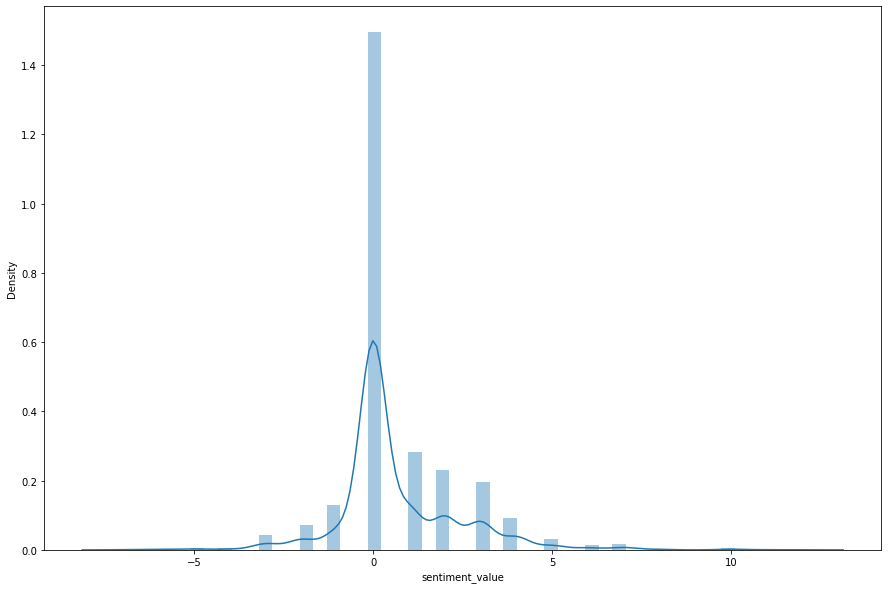

In [37]:
import warnings 
warnings.filterwarnings('ignore')

# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])
